In [1]:
%matplotlib inline
import pyodbc 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
 
connection = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                      'Server=DESKTOP-ATL660H;'
                      'Database=AdventureWorks2012;'
                      'Trusted_Connection=yes;')


In [24]:
query ='''
SELECT
A.[LineTotal] as Sales
,A.[UnitPrice]*A.[OrderQty] AS Revenue
,B.OrderDate
,CASE WHEN B.[OnlineOrderFlag] = 0 THEN 'Reseller' ELSE 'Online' END AS Sales_Channel
,C.[Name] AS Region
FROM[Sales].[SalesOrderDetail] AS A
LEFT JOIN [Sales].[SalesOrderHeader] AS B
ON A.[SalesOrderID] = B.[SalesOrderID]
LEFT JOIN [Sales].[SalesTerritory] AS C
ON B.[TerritoryID] = C.[TerritoryID]
WHERE C.[Name] = 'Southeast'
'''

In [25]:
data= pd.read_sql(query,connection)
data

,Sales,Revenue,OrderDate,Sales_Channel,Region
0,2024.9940,2024.9940,2011-05-31,Reseller,Southeast
1,6074.9820,6074.9820,2011-05-31,Reseller,Southeast
2,2024.9940,2024.9940,2011-05-31,Reseller,Southeast
3,2039.9940,2039.9940,2011-05-31,Reseller,Southeast
4,2039.9940,2039.9940,2011-05-31,Reseller,Southeast
5,4079.9880,4079.9880,2011-05-31,Reseller,Southeast
6,2039.9940,2039.9940,2011-05-31,Reseller,Southeast
7,86.5212,86.5212,2011-05-31,Reseller,Southeast
8,28.8404,28.8404,2011-05-31,Reseller,Southeast
9,34.2000,34.2000,2011-05-31,Reseller,Southeast


In [27]:
cols = ['Revenue','Sales_Channel','Region']
df = data.drop(cols, axis=1, inplace=False)
df.head()

,Sales,OrderDate
0,2024.994,2011-05-31
1,6074.982,2011-05-31
2,2024.994,2011-05-31
3,2039.994,2011-05-31
4,2039.994,2011-05-31


In [28]:
df = df.set_index(['OrderDate'])

In [29]:
y = df['Sales'].resample('MS').sum()

In [30]:
y.head()

OrderDate
2011-05-01    139164.1943
2011-06-01         0.0000
2011-07-01    301907.4914
2011-08-01    308747.9447
2011-09-01         0.0000
Freq: MS, Name: Sales, dtype: float64

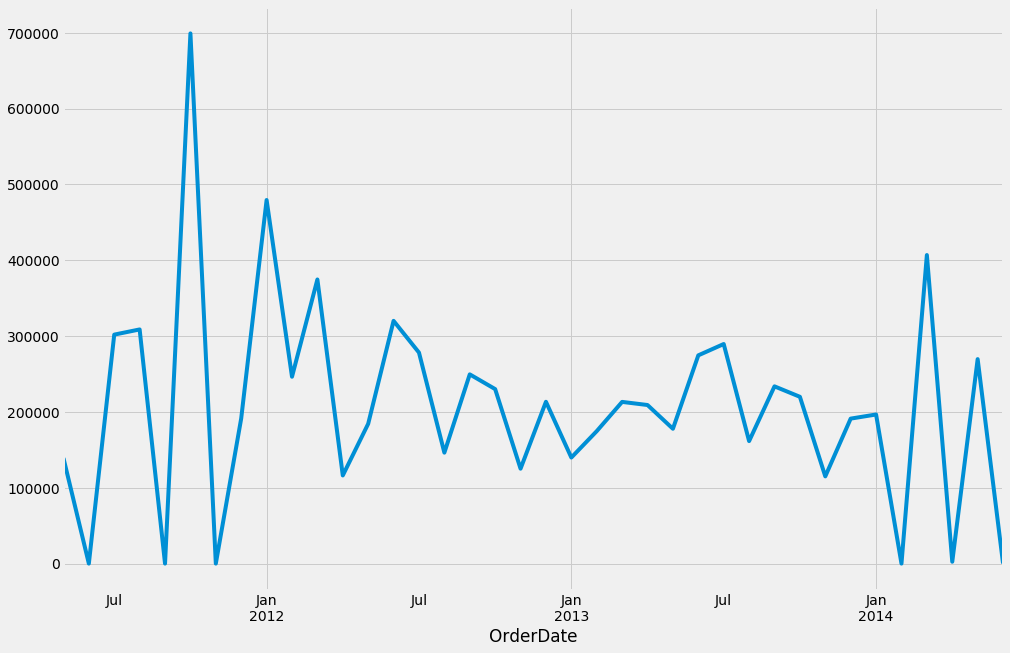

In [31]:
y.plot(figsize=(15, 10))
plt.show()

In [32]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [10]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1077.6487845506342
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2251137.439558642
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:703.9090279712922
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:735.4271455200729
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:707.4356817110461
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:392.35156361305525
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1041.6735363331363
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2250738.7866961155
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:670.7844125529343
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:746.7679911415532
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:689.0178360066524
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:390.0538755498027
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1027.4883397619535
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:697.2923042380658
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:711.3351329371213
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:373.70982326420545
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 -

In [34]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            res = tmp_mdl.fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 model - AIC:668.7268307784221


In [35]:
# print statistics
print(res.aic)
print(res.summary())

668.7268307784221
                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   38
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -330.363
Date:                            Thu, 02 Apr 2020   AIC                            668.727
Time:                                    12:40:44   BIC                            673.602
Sample:                                05-01-2011   HQIC                           670.079
                                     - 06-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6407      0.358     -1.788      0.074      -1.343       0.062
ma.L1         -0.

In [36]:
plt.style.use('fivethirtyeight')
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [37]:
from scipy.stats import chi2
chi = chi2.isf(q=0.05, df=116)
chi

142.13816003902645

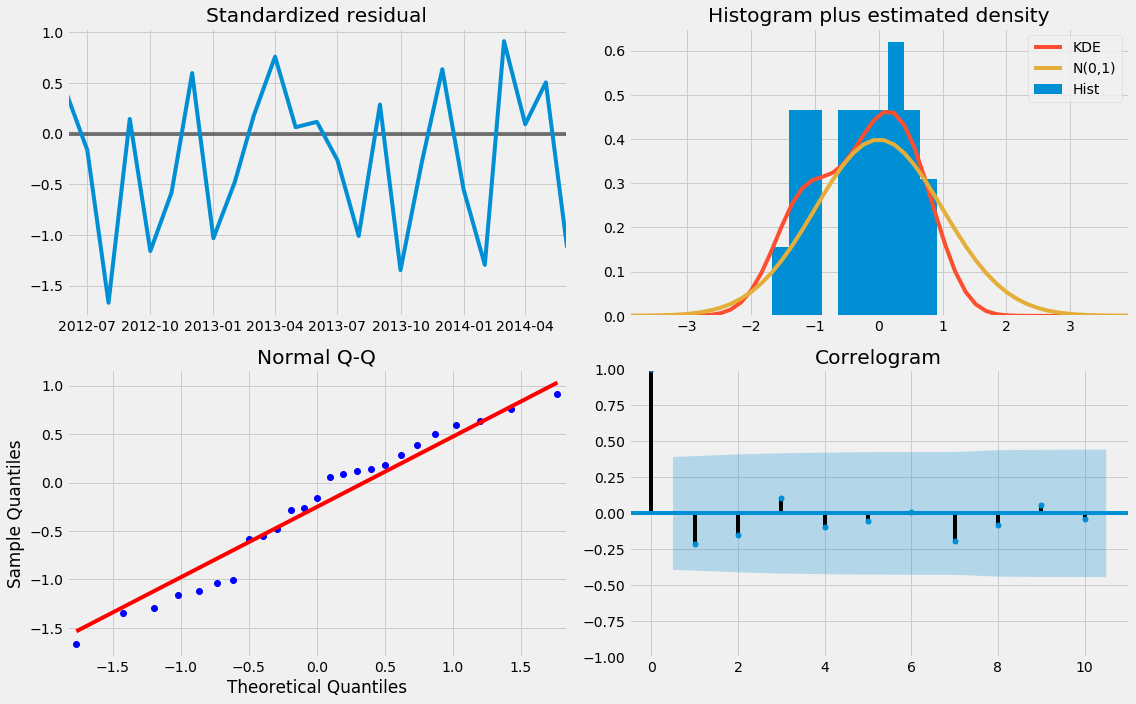

In [38]:
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.show()

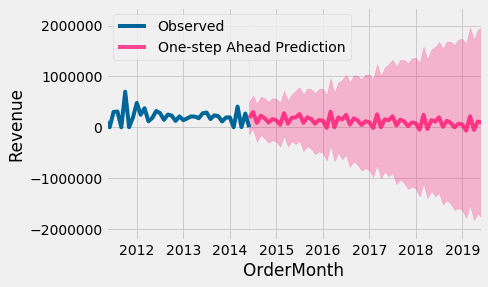

In [39]:
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2014-06-01'), 
                          end=pd.to_datetime('2019-06-01'),
                          dynamic=True)
pred_ci = pred.conf_int()
 
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');
 
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
 
# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-06-01'), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

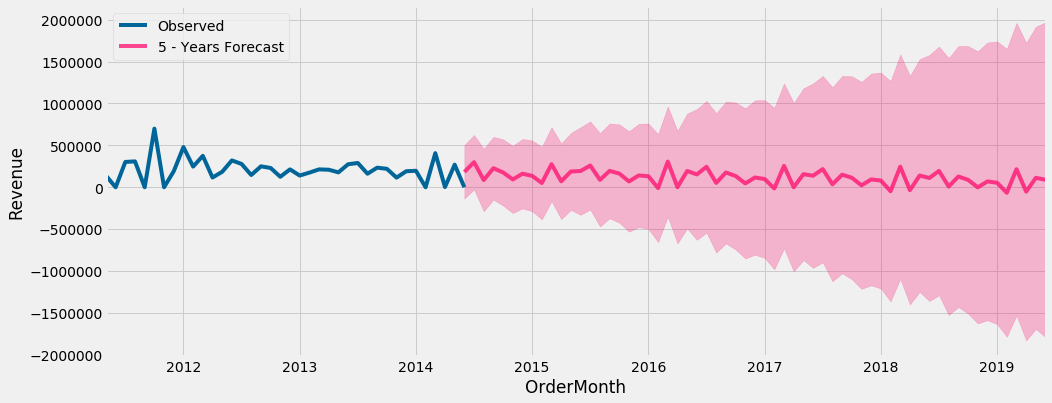

In [40]:
#pred.predicted_mean
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(figsize=(15, 6),label='5 - Years Forecast', alpha=.7, color='#ff0066')
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
#y.plot(figsize=(15, 6))
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

In [41]:
all_dfs = [y, pred.predicted_mean]

In [42]:
df = pd.DataFrame(np.array(pd.concat(all_dfs).reset_index(drop=False)), columns =  ['Month', 'Revenue'])

In [43]:
df = df.set_index(['Month'])

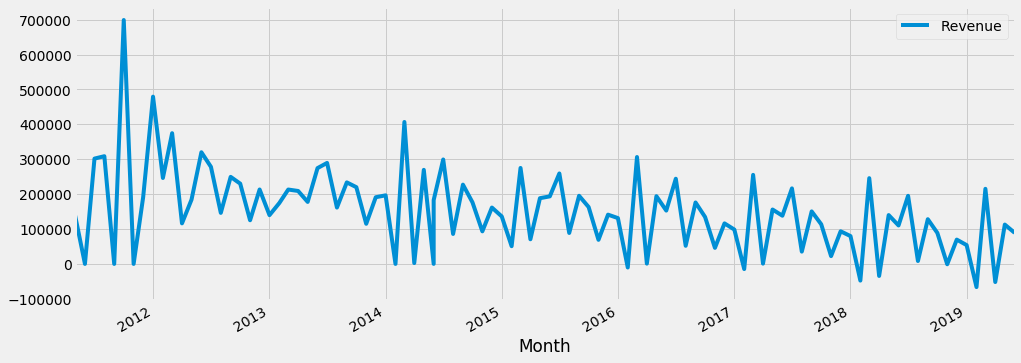

In [44]:
#df.plot(label='Revenue',color='#006699');
df.plot(figsize=(15, 6))